<a href="https://colab.research.google.com/github/sonnyson73/DS_Projects/blob/master/DL_CNN_Capstone_Project_MultiClass_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together.

In [8]:
my_data_dir='/content/drive/MyDrive/Colab Notebooks/flower_photos'
os.listdir(my_data_dir)

['train', 'test', 'tulips', 'sunflowers', 'roses', 'dandelion', 'daisy']

In [9]:
import os
from sklearn.model_selection import train_test_split

# Veri dizininizi belirtin
my_data_dir = '/content/drive/MyDrive/Colab Notebooks/flower_photos'

# Sınıf isimlerini alın (LICENSE.txt hariç)
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Tüm görüntü yollarını toplayın
image_paths = []
labels = []
for class_name in classes:
    class_dir = os.path.join(my_data_dir, class_name)
    class_image_paths = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir) if fname.endswith('.jpg')]
    image_paths += class_image_paths
    labels += [class_name] * len(class_image_paths)

# Eğitim ve test setlerini oluşturun
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, shuffle=True, stratify=labels)

# Eğitim ve test setlerini yazdırın
print(f"Training set: {len(train_image_paths)} images")
print(f"Test set: {len(test_image_paths)} images")


ValueError: ignored

NameError: ignored

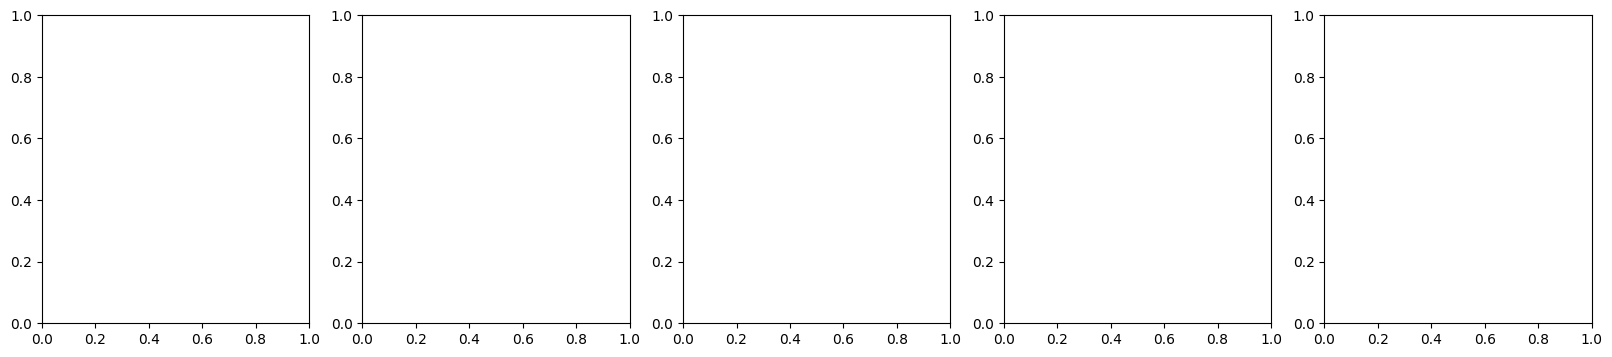

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# İlk 5 resmi yükleyin ve görselleştirin
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    img_path = train_image_paths[i]
    img = Image.open(img_path)

    # Resmi görselleştirin
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {train_labels[i]}")
    axes[i].axis('off')

    # Resmin şekline bakın
    print(f"Image {i+1} shape: {img.size}")

plt.tight_layout()
plt.show()


In [12]:
import shutil

# Eğitim ve test setleri için klasör yollarını belirleyin
train_dir = os.path.join(my_data_dir, 'train')
test_dir = os.path.join(my_data_dir, 'test')

# Eğitim ve test setleri için klasörleri oluşturun
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Sınıflar için klasörleri oluşturun
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Dosyaları yeni klasörlere taşıyın
for i, img_path in enumerate(train_image_paths):
    new_path = os.path.join(train_dir, train_labels[i], os.path.basename(img_path))
    shutil.move(img_path, new_path)

for i, img_path in enumerate(test_image_paths):
    new_path = os.path.join(test_dir, test_labels[i], os.path.basename(img_path))
    shutil.move(img_path, new_path)


NameError: ignored

In [13]:
import os
import numpy as np
from PIL import Image

# Resimlerin bulunduğu dizini belirtin
img_dir = '/content/drive/MyDrive/Colab Notebooks/flower_photos/train/daisy'

# Dizindeki tüm dosya yollarını listeyin
img_paths = [os.path.join(img_dir, fname) for fname in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, fname))]

# 4. resmin yolunu alın (indeksleme 0'dan başlar, bu yüzden 4. resim için indeks 3'ü kullanın)
img_path = img_paths[0]

# Resmi yükleyin
img = Image.open(img_path)

# Resmi bir Numpy dizisine dönüştürün
img_array = np.array(img)

# Dizinin maksimum ve minimum değerlerini bulun
max_value = img_array.max()
min_value = img_array.min()
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")


Max value: 238
Min value: 0


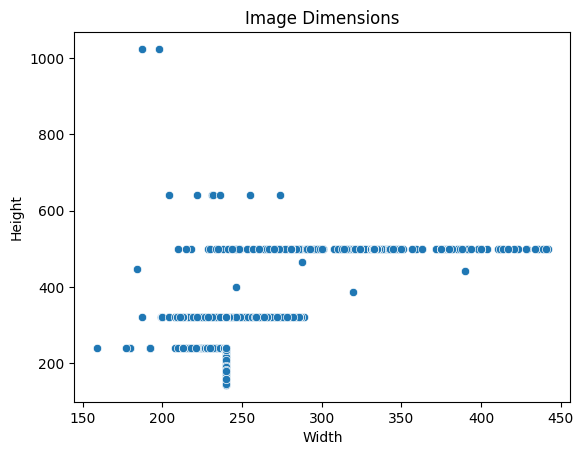

In [14]:
import os
from matplotlib import pyplot as plt
import seaborn as sns

train_dir='/content/drive/MyDrive/Colab Notebooks/flower_photos/train'
os.listdir(my_data_dir)

x = []
y = []

# Sınıflar için bir döngü başlatın
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)

    # Her sınıfın resimleri için bir döngü başlatın
    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):
            img = plt.imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            x.append(d1)
            y.append(d2)

# Boyutları scatter plot ile görselleştirin
sns.scatterplot(x=x, y=y)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Dimensions')
plt.show()



**Let's decide on the final dimension of these images.**

In [15]:
print(np.mean(x))
print(np.mean(y))

271.4713896457766
364.5572207084469


In [16]:
image_shape = (256,256,3)

In [ ]:
# help(ImageDataGenerator)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

batch_size = 32

train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)

test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)

Found 2936 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


# Creating the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Callbacks:
early_stop = EarlyStopping(monitor='val_loss',patience=10)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 128)       0

In [19]:
results = model.fit(train_image_gen,epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop, checkpoint])

Epoch 1/20
92/92 [==============================] - ETA: 0s - loss: 1.5557 - accuracy: 0.2568
Epoch 1: val_loss improved from inf to 1.34060, saving model to best_model.h5
92/92 [==============================] - 244s 2s/step - loss: 1.5557 - accuracy: 0.2568 - val_loss: 1.3406 - val_accuracy: 0.3774
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - ETA: 0s - loss: 1.3468 - accuracy: 0.4401
Epoch 2: val_loss improved from 1.34060 to 1.16852, saving model to best_model.h5
92/92 [==============================] - 69s 753ms/step - loss: 1.3468 - accuracy: 0.4401 - val_loss: 1.1685 - val_accuracy: 0.4850
Epoch 3/20
92/92 [==============================] - ETA: 0s - loss: 1.1680 - accuracy: 0.5232
Epoch 3: val_loss improved from 1.16852 to 1.06904, saving model to best_model.h5
92/92 [==============================] - 70s 758ms/step - loss: 1.1680 - accuracy: 0.5232 - val_loss: 1.0690 - val_accuracy: 0.5572
Epoch 4/20
92/92 [==============================] - ETA: 0s - loss: 1.0743 - accuracy: 0.5698
Epoch 4: val_loss improved from 1.06904 to 0.98317, saving model to best_model.h5
92/92 [==============================] - 70s 767ms/step - loss: 1.0743 - accuracy: 0.5698 - val_loss: 0.9832 - val_accuracy: 0.5613
Epoch 5/20
92/92 [==============================] - ETA: 0s - loss: 1.0058 - accuracy: 

## Model Training

# Evaluating the Model

In [20]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.555749,0.256812,1.340603,0.377384
1,1.346771,0.440055,1.168520,0.485014
2,1.167984,0.523161,1.069036,0.557221
3,1.074343,0.569823,0.983171,0.561308
4,1.005750,0.597411,1.010105,0.576294


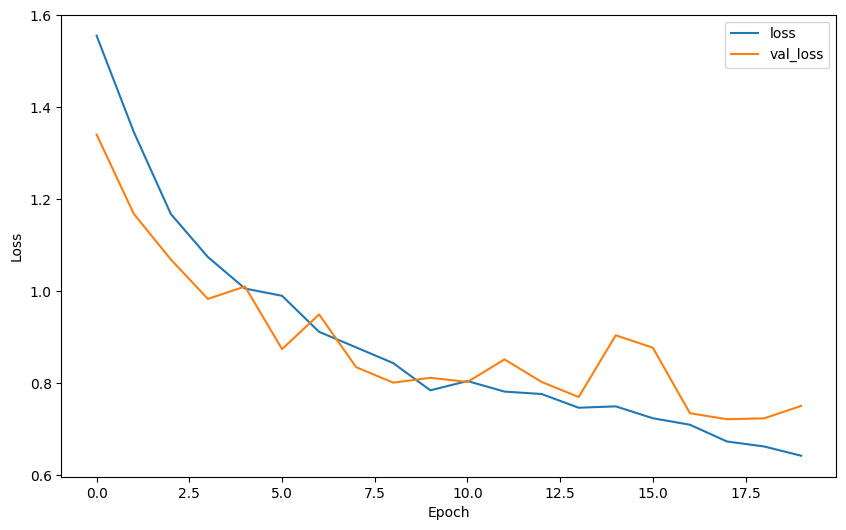

In [21]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

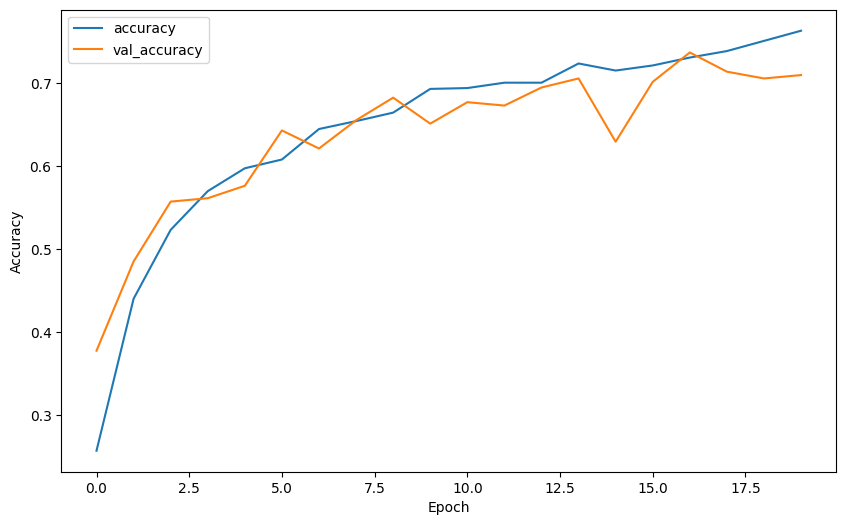

In [22]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [23]:
model.metrics_names

['loss', 'accuracy']

In [28]:
model.evaluate(test_image_gen)

23/23 [==============================] - 22s 932ms/step - loss: 0.7201 - accuracy: 0.7302


[0.7201058268547058, 0.7302452325820923]

In [29]:
pred_probabilities = model.predict(test_image_gen)

23/23 [==============================] - 14s 588ms/step


In [30]:
pred_probabilities

array([[2.3113402e-02, 8.8877445e-01, 5.9022304e-02, 3.4099410e-03,
        2.5679925e-02],
       [9.1257360e-04, 7.9858778e-03, 1.1813955e-04, 9.8704034e-01,
        3.9430456e-03],
       [2.8959155e-05, 2.8107272e-06, 3.3298776e-02, 3.8537251e-05,
        9.6663094e-01],
       ...,
       [9.7648495e-01, 9.1297331e-04, 1.1305866e-02, 5.3018155e-03,
        5.9944666e-03],
       [6.0113911e-05, 3.4376788e-03, 5.6525109e-06, 9.9631566e-01,
        1.8082834e-04],
       [6.2504872e-03, 1.0251305e-03, 7.9832876e-01, 3.8471955e-04,
        1.9401087e-01]], dtype=float32)

In [31]:
test_image_gen.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [32]:
predictions = pred_probabilities > 0.5

In [33]:
predictions[:50]

array([[False,  True, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, Fal

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(test_image_gen.classes,predictions))

ValueError: ignored

In [39]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# En yüksek olasılığa sahip sınıfın indeksini alarak tahminleri sınıf etiketlerine dönüştürün
predictions_labels = np.argmax(predictions, axis=1)

# Şimdi sınıflandırma raporunu oluşturabilirsiniz
print(classification_report(test_image_gen.classes, predictions_labels))

# Şimdi kafa karışıklığı matrisini oluşturabilirsiniz
cm = confusion_matrix(test_image_gen.classes, predictions_labels)
cm



              precision    recall  f1-score   support

           0       0.20      0.31      0.25       127
           1       0.25      0.24      0.25       179
           2       0.17      0.13      0.15       128
           3       0.14      0.12      0.13       140
           4       0.25      0.23      0.24       160

    accuracy                           0.21       734
   macro avg       0.20      0.21      0.20       734
weighted avg       0.21      0.21      0.20       734



array([[40, 30, 16, 23, 18],
       [49, 43, 22, 29, 36],
       [36, 25, 17, 26, 24],
       [31, 43, 20, 17, 29],
       [43, 31, 23, 27, 36]])

In [37]:
confusion_matrix(test_image_gen.classes,predictions)

ValueError: ignored

In [40]:
from tensorflow.keras.models import load_model
model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Predicting on an Image

In [41]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [42]:
test_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('best_model.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("/content/drive/MyDrive/Colab Notebooks/roses_2.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

1/1 [==============================] - 0s 472ms/step
Tahmin edilen sınıf: 2


In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('best_model.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("/content/drive/MyDrive/Colab Notebooks/roses_1.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

1/1 [==============================] - 0s 119ms/step
Tahmin edilen sınıf: 2


In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('best_model.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("/content/drive/MyDrive/Colab Notebooks/daisy_1.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

1/1 [==============================] - 0s 342ms/step
Tahmin edilen sınıf: 0


In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('best_model.h5')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image = Image.open("/content/drive/MyDrive/Colab Notebooks/tulips_2.jpg")
image = image.resize((256, 256))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Tahmin yapın
prediction = model.predict(image_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)

1/1 [==============================] - 0s 188ms/step
Tahmin edilen sınıf: 4


![image.png](attachment:image.png)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Callbacks:
early_stop = EarlyStopping(monitor='val_loss',patience=10)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 127, 127, 64)      256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 128)     1